### BREAST CANCER PREDICTION USING DIFFERENT MACHINE LEARNING ALGORITHM

In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing Evaluation Matrics
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
#importing Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Loading the dataset
Data_set = pd.read_csv("breast-cancer-wisconsin.csv")

In [8]:
#Combating the Dataset into Array
Data_set = np.array(Data_set)

In [9]:
#Inseting the name of the columns
Data_set = pd.DataFrame(Data_set,columns= ['Id Number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                          'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli',
                                          'Mitoses','Class'])

In [10]:
#Convating the Dataset into numeric means from object to int
Data_set=Data_set.apply(pd.to_numeric,errors='ignore')

In [11]:
#Data_set['Bare Nuclei'] = Data_set['Bare Nuclei'].astype(int)

In [12]:
#Printing the First 5 Rows of the Dataset
Data_set.head()

,Id Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [13]:
#Printing the last 5 rows of the data set
Data_set.tail()

,Id Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [14]:
#Checking for null values
Data_set.isna().sum()

Id Number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
#Data_set = Data_set.apply(pd.to_numeric)

In [16]:
#Checking for the Dataset info
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id Number                    698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [17]:
#Checking Statistical Relationship of the Features
Data_set.describe()

,Id Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [18]:
#Counting the values of the Target
Data_set["Class"].value_counts()

2    457
4    241
Name: Class, dtype: int64

###### 2 for benigh
###### 4 for malignant

<AxesSubplot:>

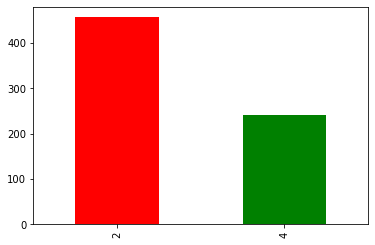

In [19]:
#Ploting the Bar chat for the Cancer class
Data_set["Class"].value_counts().plot.bar(color=["Red","Green"])

In [20]:
#Spliting the data into target and features
X = Data_set.drop(["Id Number","Class",'Bare Nuclei'],axis=1)
Y = Data_set["Class"]

In [21]:
#Checking for the shape of features and Target Class
X.shape,Y.shape

((698, 8), (698,))

In [22]:
#Spliting the Data into Train and Test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1234,shuffle=True)

In [23]:
# Checking the Shape of the Test and Train Data
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((558, 8), (558,), (140, 8), (140,))

#### MODELLING

In [24]:
#Loading all the algorithm in a single list for comparison
models = [KNeighborsClassifier(),GaussianNB(),SVC(),LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier()]

In [25]:
def tr_tes_comp():
    for model in models:
        model.fit(x_train,y_train)
        predic_test_train = model.predict(x_test)
        Acc_test_train = accuracy_score(y_test,predic_test_train)
        print("The Accuracy Score for the ",model,"= ",Acc_test_train)

In [26]:
tr_tes_comp()

The Accuracy Score for the  KNeighborsClassifier() =  0.9571428571428572
The Accuracy Score for the  GaussianNB() =  0.9642857142857143
The Accuracy Score for the  SVC() =  0.9642857142857143
The Accuracy Score for the  LogisticRegression() =  0.9642857142857143
The Accuracy Score for the  RandomForestClassifier() =  0.9642857142857143
The Accuracy Score for the  DecisionTreeClassifier() =  0.9357142857142857


###### As we see all the model perfoam well but the Support Vector is much better but try try cross validation to split the into k-fold 

In [27]:
#Loading all the algorithm in a single list for comparison
models = [KNeighborsClassifier(),GaussianNB(),SVC(),LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier()]

In [28]:
def cv_score_comp():
    for model in models:
        cv_score = cross_val_score(model,X,Y,cv=5)
        mean_acc_score = sum(cv_score)/ len(cv_score)
        mean_acc_score = mean_acc_score * 100
        mean_acc_score = round(mean_acc_score,2)
        print("The Cross Validation Score for ",model,"=",cv_score)
        print("The mean Accuracy Score for ",model,"= ",mean_acc_score)

In [29]:
cv_score_comp()

The Cross Validation Score for  KNeighborsClassifier() = [0.93571429 0.93571429 0.94285714 0.98561151 0.97122302]
The mean Accuracy Score for  KNeighborsClassifier() =  95.42
The Cross Validation Score for  GaussianNB() = [0.92857143 0.92857143 0.97142857 0.96402878 0.97841727]
The mean Accuracy Score for  GaussianNB() =  95.42
The Cross Validation Score for  SVC() = [0.91428571 0.93571429 0.97142857 0.97841727 0.97841727]
The mean Accuracy Score for  SVC() =  95.57
The Cross Validation Score for  LogisticRegression() = [0.91428571 0.92857143 0.95714286 0.98561151 0.97122302]
The mean Accuracy Score for  LogisticRegression() =  95.14
The Cross Validation Score for  RandomForestClassifier() = [0.92857143 0.93571429 0.96428571 0.97841727 0.97841727]
The mean Accuracy Score for  RandomForestClassifier() =  95.71
The Cross Validation Score for  DecisionTreeClassifier() = [0.89285714 0.93571429 0.88571429 0.94964029 0.9352518 ]
The mean Accuracy Score for  DecisionTreeClassifier() =  91.98


###### As we see All the models perfoam well Again but the Logistic Regression is Excellent so let try Hyperparameter tunning to used Different parameters of Logistic Regression Parameter to find the best Parameter Combination

### HYPERPARAMETER TUNNING

In [30]:
LOG = LogisticRegression()

In [31]:
params = {
"penalty":['l1', 'l2', 'elasticnet', 'none'],
"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
"C":[2,5,10,15,20,30]
}

In [32]:
#Loading Gridsearch Parameters
GRD = GridSearchCV(LOG,params,cv=5)

In [33]:
#Fitting the Data into the Grid Search 
GRD.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 5, 10, 15, 20, 30],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [34]:
#The for the best parameters
GRD.best_params_

{'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}

In [35]:
#Check for the best score
GRD.best_score_

0.9570914696813977

In [36]:
#Checking for the whole Cv score
GRD.cv_results_

{'mean_fit_time': array([0.00663743, 0.        , 0.01250381, 0.        , 0.03333392,
        0.03055558, 0.01562595, 0.00624909, 0.01562524, 0.01977649,
        0.        , 0.        , 0.        , 0.        , 0.00312538,
        0.01874976, 0.01562519, 0.        , 0.01562481, 0.02025414,
        0.        , 0.00312648, 0.00625401, 0.00312538, 0.01562395,
        0.02187028, 0.01562476, 0.00312552, 0.01249948, 0.01771283,
        0.0031292 , 0.        , 0.        , 0.        , 0.        ,
        0.02499895, 0.00625105, 0.003126  , 0.00937524, 0.01562967,
        0.        , 0.        , 0.009377  , 0.        , 0.01562514,
        0.01648684, 0.0124999 , 0.00937953, 0.015625  , 0.01691542,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02187443, 0.01875024, 0.        , 0.01562419, 0.01562533,
        0.00312529, 0.        , 0.00312743, 0.        , 0.01874733,
        0.02187376, 0.01562777, 0.00624976, 0.015623  , 0.01803713,
        0.        , 0.        ,

In [37]:
Grid_Pram=pd.DataFrame(GRD.cv_results_)

In [38]:
Grid_Pram

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006637,0.007349,0.000000,0.000000,2,l1,newton-cg,"{'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
1,0.000000,0.000000,0.000000,0.000000,2,l1,lbfgs,"{'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
2,0.012504,0.011697,0.000000,0.000000,2,l1,liblinear,"{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}",0.914286,0.928571,0.957143,0.985612,0.978417,0.952806,0.027648,16
3,0.000000,0.000000,0.000000,0.000000,2,l1,sag,"{'C': 2, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
4,0.033334,0.028857,0.005927,0.003676,2,l1,saga,"{'C': 2, 'penalty': 'l1', 'solver': 'saga'}",0.928571,0.921429,0.957143,0.978417,0.985612,0.954234,0.025739,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.031249,0.000007,0.000000,0.000000,30,none,newton-cg,"{'C': 30, 'penalty': 'none', 'solver': 'newton...",0.914286,0.928571,0.957143,0.985612,0.971223,0.951367,0.026438,36
116,0.015626,0.000002,0.000000,0.000000,30,none,lbfgs,"{'C': 30, 'penalty': 'none', 'solver': 'lbfgs'}",0.914286,0.928571,0.957143,0.985612,0.971223,0.951367,0.026438,36
117,0.003125,0.006249,0.000000,0.000000,30,none,liblinear,"{'C': 30, 'penalty': 'none', 'solver': 'liblin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
118,0.015625,0.000004,0.000000,0.000000,30,none,sag,"{'C': 30, 'penalty': 'none', 'solver': 'sag'}",0.935714,0.928571,0.957143,0.985612,0.978417,0.957091,0.022532,1


In [39]:
Grid_Pram[["param_C","param_penalty","param_solver"]]

,param_C,param_penalty,param_solver
0,2,l1,newton-cg
1,2,l1,lbfgs
2,2,l1,liblinear
3,2,l1,sag
4,2,l1,saga
...,...,...,...
115,30,none,newton-cg
116,30,none,lbfgs
117,30,none,liblinear
118,30,none,sag


##### RANDOM SEARCH

In [40]:
RDD = RandomizedSearchCV(LOG,params,cv=5,verbose=True)

In [41]:
RDD.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [2, 5, 10, 15, 20, 30],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=True)

In [42]:
RDD.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 2}

In [43]:
RDD.best_score_

0.9542343268242549

In [44]:
RDD.best_estimator_

LogisticRegression(C=2, penalty='l1', solver='saga')

##### Prediction


In [45]:
LGG = RDD.best_estimator_
predict_RDD=LGG.predict(x_test)

In [46]:
Accuracy_Score = accuracy_score(y_test,predict_RDD)

In [47]:
Accuracy_Score

0.9642857142857143

In [48]:
GRD.best_estimator_
predict_GRD = GRD.predict(x_test)

In [49]:
Accuracy_Score_GRD = accuracy_score(y_test,predict_GRD)

In [50]:
Accuracy_Score_GRD

0.9642857142857143

#### MAKING PREDICTIVE SYSTEM

In [51]:
features =np.array([[1,1,1,1,2,1,1,1]])

In [52]:
features = features.astype(int)

In [53]:
pre = LGG.predict(features)

In [54]:
print("The Cancer class of this Features is ",pre)

The Cancer class of this Features is  [2]


In [55]:
import pickle

In [56]:
dict_filename = "Save_step.pkl"

In [57]:
data = {"Model":LGG}

In [58]:
with open("Save_step.pkl","wb") as file:
    pickle.dump(data,file)

In [59]:
#read saved file
with open("Save_step.pkl","rb") as file:
    data=pickle.load(file)

In [60]:
regre = data["Model"]

In [61]:
predd = regre.predict(features)

In [62]:
print("The Cancer class of this Features is ",predd)

The Cancer class of this Features is  [2]


In [63]:
import streamlit as st

In [64]:
def load_model():
    with open("Save_step.pkl","rb") as file:
        data=pickle.load(file)
    return data
data = load_model()
regre=data["Model"]

In [66]:
def show_predict_page():
    st.title("DATA SCIENTIST SALARY PREDICTION BY ABDULLAHI AHMAD")
    st.write("We need some information from you")
    Clump_Thickness=(1,2,3,4,5,6,7,8,9,0)
    Uniformity_of_Cell_Size=(1,2,3,4,5,6,7,8,9,0)
    Uniformity_of_Cell_Shape=(1,2,3,4,5,6,7,8,9,0)
    Marginal_Adhesion=(1,2,3,4,5,6,7,8,9,0)
    Single_Epithelial_Cell_Size=(1,2,3,4,5,6,7,8,9,0)
    Bland_Chromatin=(1,2,3,4,5,6,7,8,9,0)
    Normal_Nucleoli=(1,2,3,4,5,6,7,8,9,0)
    Mitoses=(1,2,3,4,5,6,7,8,9,0)
    Clump_Thickness=st.selectbox("Clump_Thickness",Clump_Thickness)
    Uniformity_of_Cell_Size=st.selectbox(" Uniformity_of_Cell_Size", Uniformity_of_Cell_Size)
    Uniformity_of_Cell_Shape = st.selectbox("Uniformity_of_Cell_Shape",Uniformity_of_Cell_Shape)
    Marginal_Adhesion= st.selectbox("Marginal_Adhesion",Marginal_Adhesion)
    Single_Epithelial_Cell_Size=st.selectbox(" Single_Epithelial_Cell_Size",Single_Epithelial_Cell_Size)
    Bland_Chromatin=st.selectbox("Bland_Chromatin",Bland_Chromatin)
    Normal_Nucleoli=st.selectbox("Normal_Nucleoli",Normal_Nucleoli)
    Mitoses=st.selectbox("Mitoses",Mitoses)
    ok =st.button("Disease Type")
    if ok:
        features=np.array([Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,
                          Bland_Chromatin,Normal_Nucleoli,Mitoses])
        features = features.astype(int)
        
        Disease = regre.predict(features)
        st.subheader("The Cancer Class of this Features is",Disease)

In [67]:
import pickle

In [69]:
filename = 'trained_model.sav'

In [71]:
pickle.dump(LGG,open(filename,'wb'))

In [73]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [74]:
features =np.array([[1,1,1,1,2,1,1,1]])

In [76]:
features = features.astype(int)

In [77]:
pre = loaded_model.predict(features)

In [78]:
print("The Cancer class of this Features is ",pre)

The Cancer class of this Features is  [2]
